In [41]:
import csv
import numpy as np
import matplotlib.pyplot as plt


In [42]:
data = csv.reader(open('/content/Mall_Customers.csv', "rt"))
data = list(data)
del data[0]
data

[['1', 'Male', '19', '15', '39'],
 ['2', 'Male', '21', '15', '81'],
 ['3', 'Female', '20', '16', '6'],
 ['4', 'Female', '23', '16', '77'],
 ['5', 'Female', '31', '17', '40'],
 ['6', 'Female', '22', '17', '76'],
 ['7', 'Female', '35', '18', '6'],
 ['8', 'Female', '23', '18', '94'],
 ['9', 'Male', '64', '19', '3'],
 ['10', 'Female', '30', '19', '72'],
 ['11', 'Male', '67', '19', '14'],
 ['12', 'Female', '35', '19', '99'],
 ['13', 'Female', '58', '20', '15'],
 ['14', 'Female', '24', '20', '77'],
 ['15', 'Male', '37', '20', '13'],
 ['16', 'Male', '22', '20', '79'],
 ['17', 'Female', '35', '21', '35'],
 ['18', 'Male', '20', '21', '66'],
 ['19', 'Male', '52', '23', '29'],
 ['20', 'Female', '35', '23', '98'],
 ['21', 'Male', '35', '24', '35'],
 ['22', 'Male', '25', '24', '73'],
 ['23', 'Female', '46', '25', '5'],
 ['24', 'Male', '31', '25', '73'],
 ['25', 'Female', '54', '28', '14'],
 ['26', 'Male', '29', '28', '82'],
 ['27', 'Female', '45', '28', '32'],
 ['28', 'Male', '35', '28', '61'],
 ['

In [43]:
#Encode Gender column
for i in range(len(data)):
  if data[i][1] == 'Male':
    data[i][1]  =  1
  else:
    data[i][1]  =  0
data

[['1', 1, '19', '15', '39'],
 ['2', 1, '21', '15', '81'],
 ['3', 0, '20', '16', '6'],
 ['4', 0, '23', '16', '77'],
 ['5', 0, '31', '17', '40'],
 ['6', 0, '22', '17', '76'],
 ['7', 0, '35', '18', '6'],
 ['8', 0, '23', '18', '94'],
 ['9', 1, '64', '19', '3'],
 ['10', 0, '30', '19', '72'],
 ['11', 1, '67', '19', '14'],
 ['12', 0, '35', '19', '99'],
 ['13', 0, '58', '20', '15'],
 ['14', 0, '24', '20', '77'],
 ['15', 1, '37', '20', '13'],
 ['16', 1, '22', '20', '79'],
 ['17', 0, '35', '21', '35'],
 ['18', 1, '20', '21', '66'],
 ['19', 1, '52', '23', '29'],
 ['20', 0, '35', '23', '98'],
 ['21', 1, '35', '24', '35'],
 ['22', 1, '25', '24', '73'],
 ['23', 0, '46', '25', '5'],
 ['24', 1, '31', '25', '73'],
 ['25', 0, '54', '28', '14'],
 ['26', 1, '29', '28', '82'],
 ['27', 0, '45', '28', '32'],
 ['28', 1, '35', '28', '61'],
 ['29', 0, '40', '29', '31'],
 ['30', 0, '23', '29', '87'],
 ['31', 1, '60', '30', '4'],
 ['32', 0, '21', '30', '73'],
 ['33', 1, '53', '33', '4'],
 ['34', 1, '18', '33', '9

In [44]:
#Convert String to Int And drop Customer ID
for i in range(len(data)):
  data[i] = [ int(x) for x in data[i][1:] ]
data = np.array(data)
data

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [186]:
# initialize random center points 
def init_centroids(data, k):
    # pick k centroid randomly
    return data[np.random.choice(len(data), k, replace=False)]


In [187]:
#clustering
def assign_labels(data, centroids, k):
  clusters = {} 
  for i in range(k):
    clusters[i] = []
  for featureset in data: 
    distances = [np.linalg.norm(featureset - centroid) for centroid in centroids]
    cluster = distances.index(min(distances))
    clusters[cluster].append(featureset)
  return clusters

#determine new centroids 
def update_centroids(clusters):
  new_centroids = []
  for cluster, data_points in clusters.items():
    new_centroids.append(np.average(data_points,axis=0))
  return new_centroids

#identify converged
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [188]:
def K_means():
  centroids = init_centroids(data,k)
  while True:
    clusters = assign_labels(data, centroids, k)
    new_centroids = update_centroids(clusters)
    if has_converged(centroids, new_centroids):
      break
    centroids = new_centroids

  X_ = []
  labels = []
  for cluster, datapoints in clusters.items():
    for datapoint in datapoints:
      X_.append(datapoint)
      labels.append(cluster)
  return X_, labels , centroids

In [189]:
#elbow
list_wcss  = []
list_labels = []
list_X_     = []
list_min_wcss = []

for i in range(10):
  k = i+1    
  for j in range(50):
    X_ , labels , centroids = K_means()
    #calculate WCSS
    wcss = 0  
    for K in range(k):
      for x in np.array(X_)[np.array(labels) == K, :]:
        wcss += np.power(np.linalg.norm(x - centroids[K]), 2)
    list_wcss.append(wcss)
    list_labels.append(labels)
    list_X_.append(X_)
  list_min_wcss.append(min(list_wcss))
  
print(list_min_wcss)

[308862.05999999994, 212889.442455243, 143391.59236035674, 104414.6753422016, 75399.61541401483, 58348.64136331499, 51165.18423710792, 44389.807673557676, 40635.40398440433, 37821.92606726604]


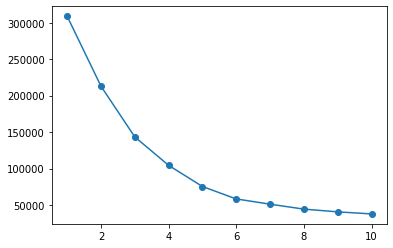

In [190]:
plt.plot(list(range(1,11)),list_min_wcss,marker='o')

In [178]:
#we choose K = 5
min_choose = list_min_wcss[4]
index = list_wcss.index(min_choose)

X0 = np.array(list_X_[index])[np.array(list_labels[index])==0,:]
X1 = np.array(list_X_[index])[np.array(list_labels[index])==1,:]
X2 = np.array(list_X_[index])[np.array(list_labels[index])==2,:]
X3 = np.array(list_X_[index])[np.array(list_labels[index])==3,:]
X4 = np.array(list_X_[index])[np.array(list_labels[index])==4,:]


In [179]:
print('We have 5 clusters')

print("Group 1 have: ",len(X0), ' people')     
print("Group 2 have: ",len(X1), ' people')  
print("Group 3 have: ",len(X2), ' people')
print("Group 4 have: ",len(X3), ' people') 
print("Group 5 have: ",len(X4), ' people') 
     

We have 5 clusters
Group 1 have:  79  people
Group 2 have:  39  people
Group 3 have:  36  people
Group 4 have:  23  people
Group 5 have:  23  people


Text(0.5, 0, 'Annual Income(k$)')

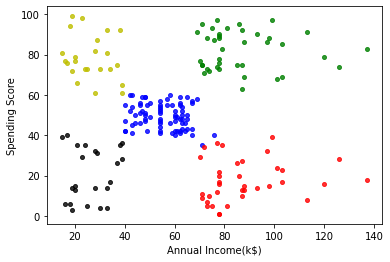

In [183]:
#Annual Income(k$) - Spending Score(1-100)
plt.plot(X0[:, 2], X0[:, 3],'bo', markersize = 4, alpha = .8)   #Group 1: blue
plt.plot(X1[:, 2], X1[:, 3],'go', markersize = 4, alpha = .8)   #Group 5: green
plt.plot(X2[:, 2], X2[:, 3],'ro', markersize = 4, alpha = .8)   #Group 3: red
plt.plot(X4[:, 2], X4[:, 3],'ko', markersize = 4, alpha = .8)   #Group 2: black
plt.plot(X3[:, 2], X3[:, 3],'yo', markersize = 4, alpha = .8)   #Group 4: yellow
plt.ylabel('Spending Score')
plt.xlabel('Annual Income(k$)')
   

Text(0, 0.5, 'Age')

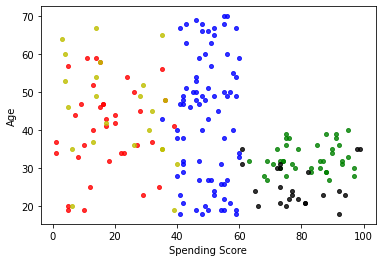

In [184]:
# Age - Spending Score (1-100)
plt.plot(X0[:, 3], X0[:, 1],'bo', markersize = 4, alpha = .8)
plt.plot(X1[:, 3], X1[:, 1],'go', markersize = 4, alpha = .8) 
plt.plot(X2[:, 3], X2[:, 1],'ro', markersize = 4, alpha = .8) 
plt.plot(X3[:, 3], X3[:, 1],'ko', markersize = 4, alpha = .8)
plt.plot(X4[:, 3], X4[:, 1],'yo', markersize = 4, alpha = .8)
plt.xlabel('Spending Score')
plt.ylabel('Age')

Text(0, 0.5, 'Age')

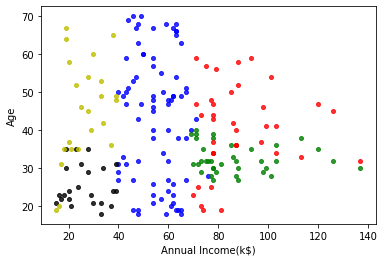

In [185]:
#Age - Annual Income(k$)
plt.plot(X0[:, 2], X0[:, 1],'bo', markersize = 4, alpha = .8)
plt.plot(X1[:, 2], X1[:, 1],'go', markersize = 4, alpha = .8) 
plt.plot(X2[:, 2], X2[:, 1],'ro', markersize = 4, alpha = .8) 
plt.plot(X3[:, 2], X3[:, 1],'ko', markersize = 4, alpha = .8)
plt.plot(X4[:, 2], X4[:, 1],'yo', markersize = 4, alpha = .8)
plt.xlabel('Annual Income(k$)')
plt.ylabel('Age')